# Part II - (ProsperLoanData Exploration)
## by (Gift Uzondu)

## Investigation Overview


> In this work, I looked into factors that can predict loan status. The main focus were Monthly status, proper ratings, prosper score and employment status.


## Dataset Overview

> This data set contains some 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. For The purpose of this project 15 variables were selected for this work.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
selected_cols = ['LoanKey', 'Term', 'LoanStatus', 'LoanOriginalAmount', 'ListingCategory (numeric)', 'ProsperRating (numeric)',
                 'ProsperRating (Alpha)', 'ProsperScore', 'BorrowerRate', 'Occupation', 'StatedMonthlyIncome', 'EmploymentStatus',
                 "DelinquenciesLast7Years", "CurrentDelinquencies"]

prosper_loan = pd.read_csv("prosperLoanData.csv", usecols=selected_cols)
prosper_loan = prosper_loan.reindex(columns=selected_cols)

In [5]:
# Renaming some of the column names
columns = {
    'LoanOriginalAmount': 'LoanAmount',
    'ListingCategory (numeric)': 'ListingCategory',
    'ProsperRating (numeric)': 'ProsperRatingNumeric',
    'ProsperRating (Alpha)': 'ProsperRatingAlpha',
    'ListingCreationDate': 'ListingDate',
    'IsBorrowerHomeowner': 'Homeowner',
    'StatedMonthlyIncome': 'MonthlyIncome'}
prosper_loan.rename(columns=columns, inplace = True)
prosper_loan.columns

Index(['LoanKey', 'Term', 'LoanStatus', 'LoanAmount', 'ListingCategory',
       'ProsperRatingNumeric', 'ProsperRatingAlpha', 'ProsperScore',
       'BorrowerRate', 'Occupation', 'MonthlyIncome', 'EmploymentStatus',
       'DelinquenciesLast7Years', 'CurrentDelinquencies'],
      dtype='object')

In [6]:
# Creating a dictionary of Listing Category 
listing_cat = {
    0:'Not Available', 1:'Debt Consolidation', 2:'Home Improvement', 3:'Business', 4:'Personal Loan',
    5:'Student', 6:'Auto', 7:'Other', 8:'Baby&Adoption', 9:'Boat', 10:'Cosmetic Procedure', 
    11: 'Engagement Ring', 12:'Green Loans', 13:'Household Expenses', 14:'Large Purchases',
    15:'Medical/Dental', 16:'Motorcycle', 17:'RV', 18:'Taxes', 19:'Vacation', 20:'Wedding Loans'
}

#Changing the column to make it descriptive
prosper_loan["ListingCategory"] = prosper_loan.ListingCategory.apply(lambda x: listing_cat[x] if x in listing_cat else x )

In [7]:
# Changing the ProsperRatingAlpha to ordered category
cat_list =  ['N/A','HR', 'E', 'D', 'C', 'B','A', 'AA',]
ordered_cat = pd.api.types.CategoricalDtype(ordered = True, categories = cat_list)
prosper_loan['ProsperRatingAlpha'] = prosper_loan['ProsperRatingAlpha'].astype(ordered_cat)

In [8]:
#selecting the categorical variables
cat_vars = prosper_loan.select_dtypes(include=["object", "category"]).columns

# Replacing nulls with N/A
for var in cat_vars:
    prosper_loan[var].fillna("N/A", inplace=True)
prosper_loan.select_dtypes(include=["object", "category"]).isnull().sum()

LoanKey               0
LoanStatus            0
ListingCategory       0
ProsperRatingAlpha    0
Occupation            0
EmploymentStatus      0
dtype: int64

In [9]:
# selecting the variables
var_list = ["ProsperRatingNumeric", "ProsperScore"]

# Replacing the nulls with the median value
for var in var_list:
    prosper_loan[var].fillna(prosper_loan[var].median(), inplace=True)


In [10]:
#Dropping null values
prosper_loan = prosper_loan.dropna()

In [11]:
# Removing current loans
prosper_loan_clean = prosper_loan[prosper_loan.LoanStatus != "Current"]

In [12]:
# encoding completed as 1 and defaulted as 0
prosper_loan_clean["LoanStatus"] = (prosper_loan_clean.LoanStatus == "Completed").astype(int)

In [13]:
# settings of graph
base_color = sns.color_palette()[0]


def graph_settings(title, xlabel="", ylabel=""):

    plt.figure(figsize=(8,5))
    
    plt.title(title, fontsize=18, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

## Distribution of Loan status

The Loan status refers to the status of loans, whether they have defaulted or completed. 0 meaning that the loan defaulted and 1 meaning that the loan was completed. I plotted the distribution of loan status showing that more than half of all loans did not default.

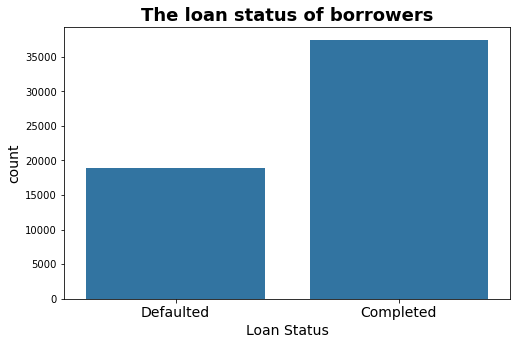

In [14]:
# Plotting the graph
graph_settings("The loan status of borrowers")
graph = sns.countplot(data=prosper_loan_clean, x="LoanStatus", color=base_color)
graph.set_xlabel("Loan Status")
graph.set_xticklabels(["Defaulted", "Completed"], fontsize=14);

##  Distribution of Monthly Income

Monthly Income in the dataset take on a very large range of values, from about \\$0 at the lowest, to over $50,000 at the highest. Plotted on a logarithmic scale, the distribution of diamond prices takes on a unimodal shape.

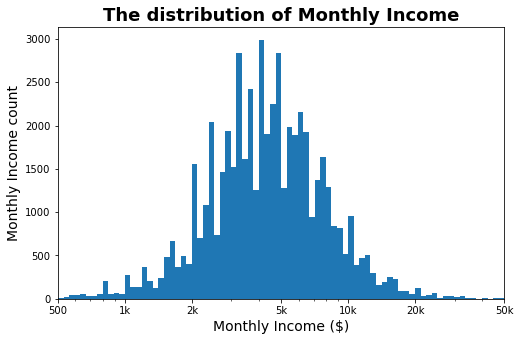

In [15]:
# applying log transformation on the data
graph_settings("The distribution of Monthly Income", "Monthly Income ($)", "Monthly Income count")
binsize = 0.025
bins = 10 ** np.arange(0, np.log10(prosper_loan_clean.MonthlyIncome.max()+binsize), binsize)
plt.hist(data = prosper_loan_clean, x = 'MonthlyIncome', bins = bins)
plt   .xscale('log')
plt.xlim(500, 50000)
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '2k', '5k', '10k', '20k', '50k']);

## Monthly Income VS Loan Status
Plotting the monthly Income against Loan status, shows that borrowers with stated higher monthly income are less likely to defaulted than thos with lower income.



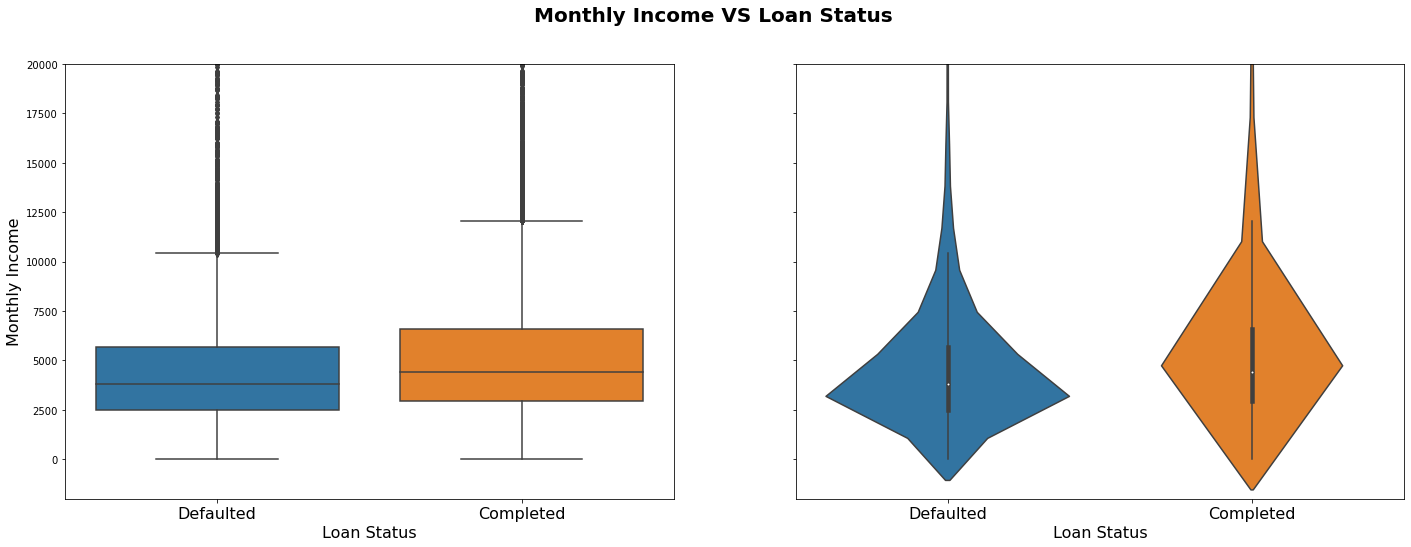

In [16]:
fig, ax = plt.subplots(ncols=2, figsize=[24, 8], sharey=True)
plt.suptitle("Monthly Income VS Loan Status", fontsize=20, fontweight="bold")
sns.boxplot(data=prosper_loan_clean, x="LoanStatus", y="MonthlyIncome", ax=ax[0])
ax[0].set_ylim(-2000, 20000)
ax[0].set_xlabel("Loan Status", fontsize=16)
ax[0].set_ylabel("Monthly Income", fontsize=16)
ax[0].set_xticklabels(["Defaulted", "Completed"], fontsize=16)

sns.violinplot(data=prosper_loan_clean, x="LoanStatus", y="MonthlyIncome", ax=ax[1])
ax[1].set_xlabel("Loan Status", fontsize=16)
ax[1].set_xticklabels(["Defaulted", "Completed"], fontsize=16)
ax[1].set_ylabel("");

## Monthly Income and Prosper Ratings and Loan Status 
A multivariate plot of monthly Income and Prosper ratings and Loan status, shows a strong relationship. That borrowers with stated higher monthly income have higher prosper ratings and are less likely to default than those with lower income and lower prosper rating.



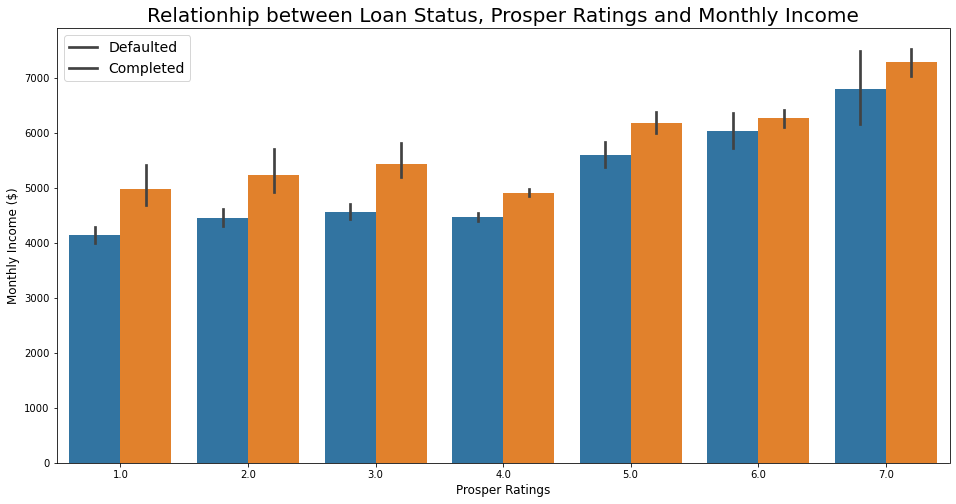

In [17]:
plt.figure(figsize=[16, 8])
sns.barplot(data=prosper_loan_clean, x="ProsperRatingNumeric", y="MonthlyIncome", hue="LoanStatus")
plt.title("Relationhip between Loan Status, Prosper Ratings and Monthly Income", fontsize=20)
plt.xlabel("Prosper Ratings", fontsize=12)
plt.ylabel("Monthly Income ($)", fontsize=12)
plt.legend(labels=["Defaulted", "Completed"], fontsize=14);

## Monthly Income and Prosper Score and Loan Status 
In this plot of monthly Income and Prosper score and Loan status, there is also a strong relationship. The borrowers with stated higher monthly income have higher prosper rating and are less likely to default than those with lower income and lower prosper score.
Also, see that the best perfoming loans have a rating of (10), and that there is a high variance in default rate for highly rated loans.


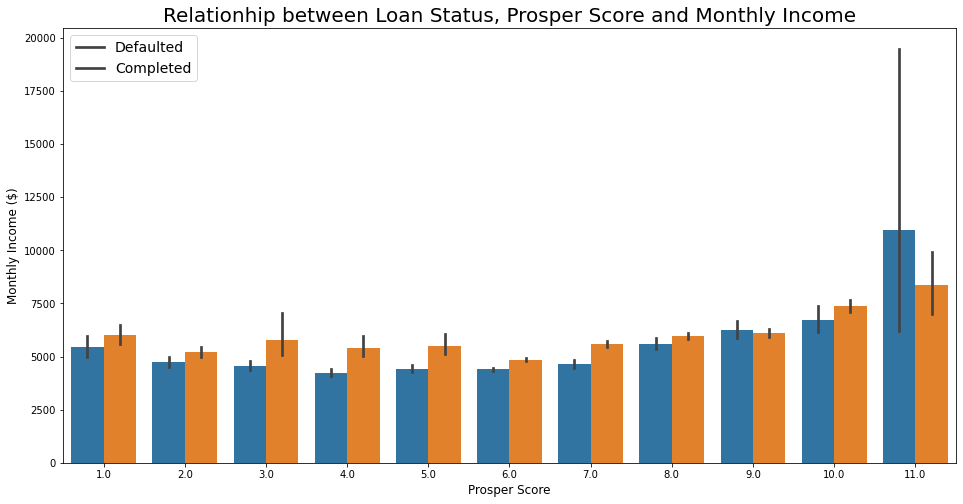

In [18]:
plt.figure(figsize=[16, 8])
sns.barplot(data=prosper_loan_clean, x="ProsperScore", y="MonthlyIncome", hue="LoanStatus")
plt.title("Relationhip between Loan Status, Prosper Score and Monthly Income", fontsize=20)
plt.xlabel("Prosper Score", fontsize=12)
plt.ylabel("Monthly Income ($)", fontsize=12)
plt.legend(labels=["Defaulted", "Completed"], fontsize=14);

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt